### Obtaining a dataset

For this exercise we'll use a dataset from the Machine Learning Repository hosted by The University of California att Irvine. You can view the complete repository [here](https://archive.ics.uci.edu/ml/index.php). We'll be using the __Adult__ dataset, which contains information from the 1994 US census. The fields in the dataset are

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* Income level: <=50K or >50K

We can use this dataset to investigate and graph out various things, using Numpy and matplotlib.

In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt

raw_data = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data').text
print(raw_data[:100])


39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 


The data is in CSV format. We can store this in a numpy matrix using the `loadtxt` method. This method, per the documentation, requires that the input be a filename, a generator, or a list of string. A generator or a list will work equally well here.

In [2]:
raw_data = raw_data.replace(", ", ",")
data = raw_data.split("\n")
dataset = np.loadtxt(data, dtype=str, encoding=str, delimiter=',')
print(dataset.shape)
print(dataset.dtype)
print(type(dataset))
print(type(dataset[0]))
print(dataset[0])

(32561, 15)
<U26
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['39' 'State-gov' '77516' 'Bachelors' '13' 'Never-married' 'Adm-clerical'
 'Not-in-family' 'White' 'Male' '2174' '0' '40' 'United-States' '<=50K']


### Analyzing the Data

Now that we have the dataset we can being our analysis. To start with, try counting the number of people with a bachelors degree (or higher) that have an income level above \\$50,000 and how many have an income level less than \\$50,000, and creating a simple bar chart illustrating the difference.

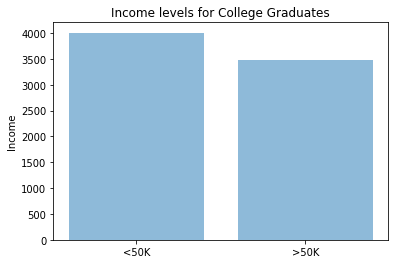

In [35]:
edu = dataset[(dataset[:, 3] == 'Bachelors') | (dataset[:, 3] == 'Masters') | (dataset[:, 3] == 'Doctorate')]
more = edu[edu[:, -1] == '>50K']
more = more.shape[0]
less = edu[edu[:, -1] == '<=50K']
less = less.shape[0]

objects = ('<50K', '>50K')
y = np.arange(len(objects))
income = [less, more]
 
plt.bar(y, income, align='center', alpha=0.5)
plt.xticks(y, objects)
plt.ylabel('Income')
plt.title('Income levels for College Graduates')
 
plt.show()

Next, determine which of the occupations is the most likely to net you more than \\$50,000 a year, and graph the results


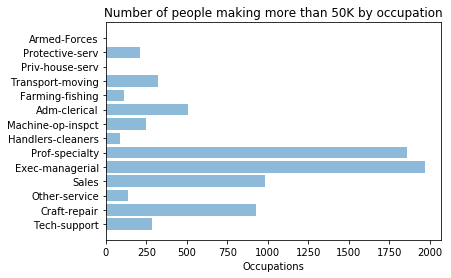

In [30]:
work = dataset[dataset[:, -1] == '>50K']
occupations = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']

counts = []
for occu in occupations:
    counts.append(work[work[:, 6] == occu].shape[0])

y = np.arange(len(occupations))
 
plt.barh(y, counts, align='center', alpha=0.5)
plt.yticks(y, occupations)
plt.xlabel('Occupations')
plt.title('Number of people making more than 50K by occupation')
 
plt.show()


Finally, determine whether marital status is a significant factor in determining income level

In [42]:
more = dataset[dataset[:, -1] == '>50K']
less = dataset[dataset[:, -1] == '<=50K']

married_l = less[less[:, 5] != 'Never-married']
not_married_l = less[less[:, 5] == 'Never-married']

married_m = more[more[:, 5] != 'Never-married']
not_married_m = more[more[:, 5] == 'Never-married']

print("Less than 50K income")
print(f"Married: {married_l.shape[0]}")
print(f"Never married: {not_married_l.shape[0]}")

print("More than 50K income")
print(f"Married: {married_m.shape[0]}")
print(f"Never married: {not_married_m.shape[0]}")

Less than 50K income
Married: 14528
Never married: 10192
More than 50K income
Married: 7350
Never married: 491
